In [ ]:
!pip install prophet
#kurulum prophet


In [4]:
import pandas as pd
from prophet import Prophet
import numpy as np


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5h32t5nt/y_feypqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5h32t5nt/xmp6z17a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14270', 'data', 'file=/tmp/tmp5h32t5nt/y_feypqo.json', 'init=/tmp/tmp5h32t5nt/xmp6z17a.json', 'output', 'file=/tmp/tmp5h32t5nt/prophet_modeli4w14xe_/prophet_model-20231010095719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


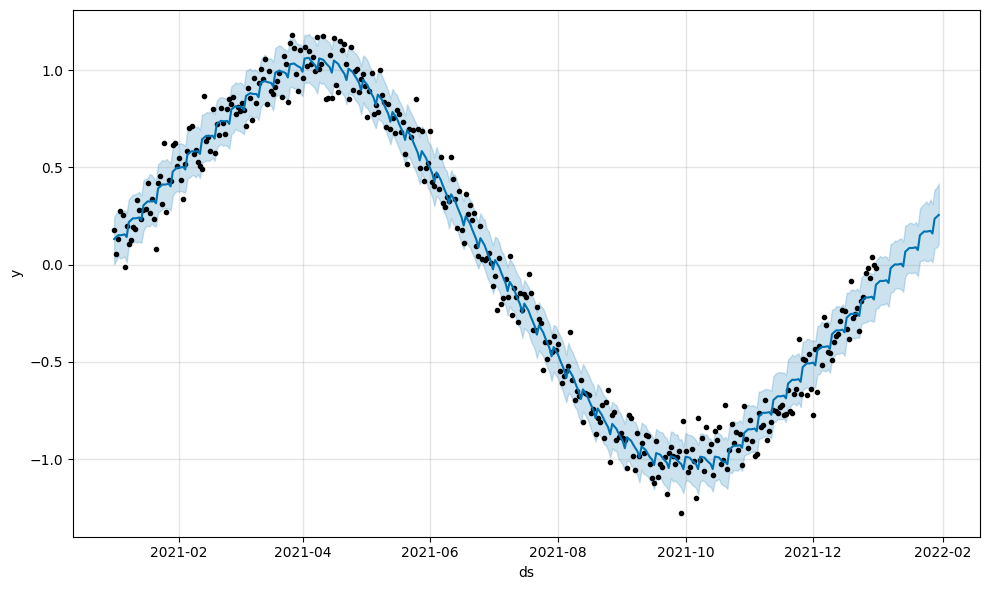

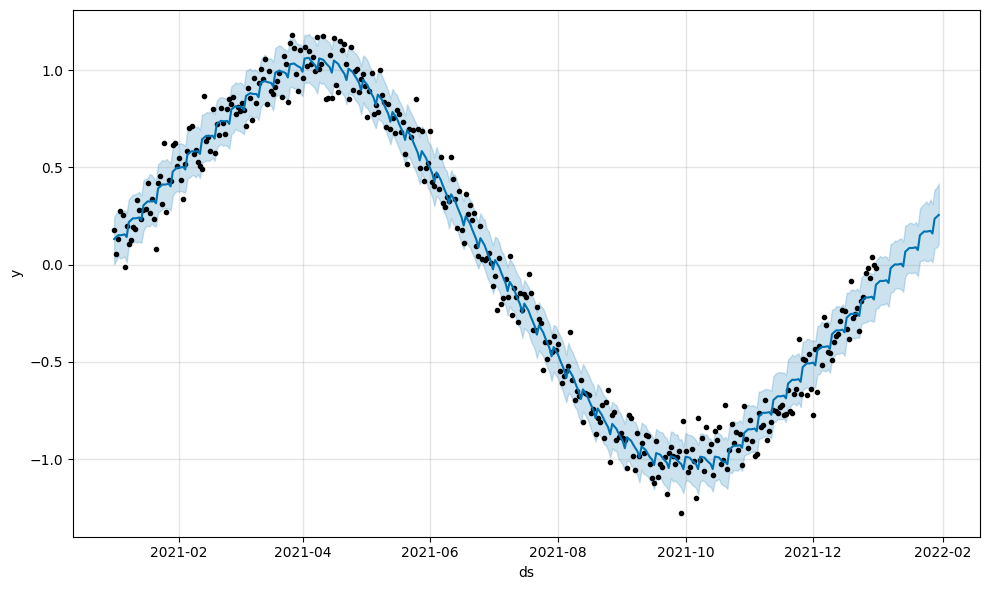

In [6]:
# Örneğin zaman serisi verileri oluşturalım (örnek olarak bir sinüs dalgası)
np.random.seed(0)
dates = pd.date_range(start='1/1/2021', end='12/31/2021')
values = np.sin(np.arange(len(dates)) * (2 * np.pi) / 365) + np.random.normal(0, 0.1, len(dates))

# Verileri bir DataFrame'e yerleştirelim
data = pd.DataFrame({'ds': dates, 'y': values})

# Prophet modelini oluşturalım ve verileri iletelim
model = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.1)
#model = Prophet()
model.fit(data)

# Gelecek için tahminler yapalım (örneğin, 30 gün sonrası)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Tahminleri ve bileşenlerini görselleştirelim
model.plot(forecast)
